In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mplot
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

conjuntoDatos = pd.read_csv('./DatasetVehicle/Car details v3.csv')
conjuntoDatos.head(100)



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Hyundai i20 Asta Optional with Sunroof 1.2,2013,525000,61500,Petrol,Dealer,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
96,Maruti Swift Dzire LDI,2016,600000,150000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
97,Hyundai Xcent 1.2 Kappa SX Option AT,2016,565000,72000,Petrol,Dealer,Automatic,First Owner,19.1 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
98,Maruti Alto LX BSIII,2008,120000,68000,Petrol,Dealer,Manual,Third Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0


In [70]:
print("Cantidad de registros null en la columna Nombre:", conjuntoDatos['name'].isnull().sum())
print("Cantidad de registros 0 en la columna Año:", conjuntoDatos['year'].isin([0]).sum())
print("Cantidad de registros 0 en la columna Precio:", conjuntoDatos['selling_price'].isin([0]).sum())
print("Cantidad de registros 0 en la columna Kilometraje:", conjuntoDatos['km_driven'].isin([0]).sum())
print("Cantidad de registros 0 en la columna Combustible:", conjuntoDatos['fuel'].isin([0]).sum())
print("Cantidad de registros null en la columna Tipo:", conjuntoDatos['seller_type'].isnull().sum())

Cantidad de registros null en la columna Nombre: 0
Cantidad de registros 0 en la columna Año: 0
Cantidad de registros 0 en la columna Precio: 0
Cantidad de registros 0 en la columna Kilometraje: 0
Cantidad de registros 0 en la columna Combustible: 0
Cantidad de registros 0 en la columna Tipo: 0


In [71]:
conjuntoDatos.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Text(0.5, 1.0, 'KILOMETRAJE vs AÑO')

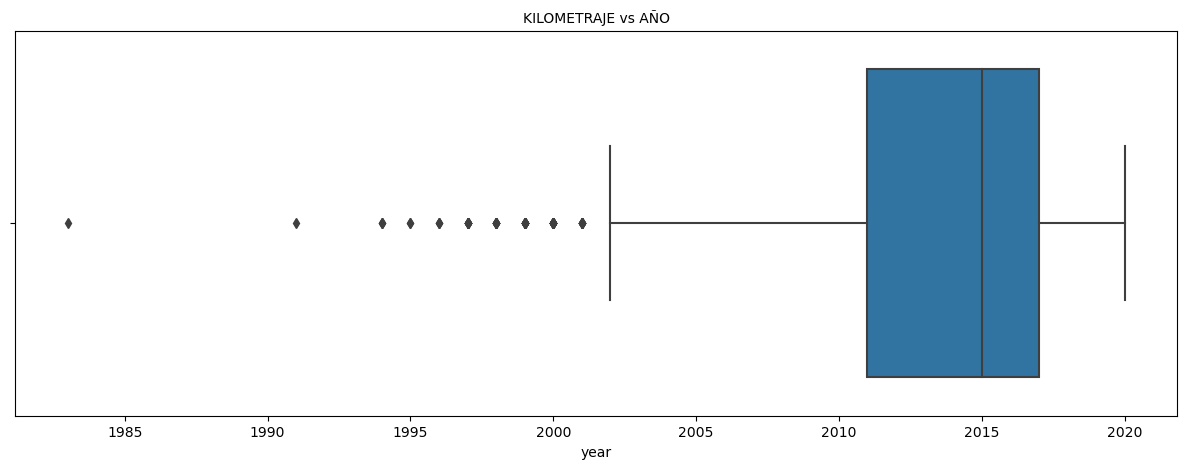

In [72]:
mplot.figure(figsize=(15,5))
sns.boxplot(x = conjuntoDatos['year'])
mplot.title("KILOMETRAJE vs AÑO", fontsize=10)